In [1]:
file_names = ["Rolling3Games.csv", "Rolling5Games.csv", "Rolling9Games.csv", "Rolling15Games.csv", "Rolling20Games.csv", "Rolling25Games.csv", "Rolling30Games.csv"]

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import RollingHelper as h
import itertools
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
# for easier reading np
np.set_printoptions(precision=3,suppress=True)

In [3]:
# get dictionary of column names
col_dict = h.getColDict()
home_col_dict = dict(itertools.islice(col_dict.items(), 12))
away_col_dict = dict(itertools.islice(col_dict.items(), 12, 24))
home_indices = list(range(12))
away_indices = list(range(12, 24))
col_dict
(0, 1, 2, 3, 5, 7, 11, 12, 13, 14, 15, 17, 19, 23)

{'FGM_HOME_avg': 0,
 'FGA_HOME_avg': 1,
 'FG3M_HOME_avg': 2,
 'FTM_HOME_avg': 3,
 'FTA_HOME_avg': 4,
 'OREB_HOME_avg': 5,
 'DREB_HOME_avg': 6,
 'AST_HOME_avg': 7,
 'STL_HOME_avg': 8,
 'TOV_HOME_avg': 9,
 'PF_HOME_avg': 10,
 'PTS_HOME_avg': 11,
 'FGM_AWAY_avg': 12,
 'FGA_AWAY_avg': 13,
 'FG3M_AWAY_avg': 14,
 'FTM_AWAY_avg': 15,
 'FTA_AWAY_avg': 16,
 'OREB_AWAY_avg': 17,
 'DREB_AWAY_avg': 18,
 'AST_AWAY_avg': 19,
 'STL_AWAY_avg': 20,
 'TOV_AWAY_avg': 21,
 'PF_AWAY_avg': 22,
 'PTS_AWAY_avg': 23}

In [4]:

# initialize accuaracy matrix and max accuracy vector
mat_length = 0
for i in range(1, 25):
    mat_length = mat_length + len(list(itertools.combinations(home_indices, i)))
acc_matrix = np.zeros((len(file_names), mat_length))


# matrix to hold all max accuracies for given feature selection size
max_acc_matrix = np.zeros((len(file_names), 12))

# variable that holds maximum overall accuracy
overall_max_acc = 0
# list to hold overall max features
overall_max_indices = []


# loop through data files
for fname_ind in range(len(file_names)):
    with open(f'../../data/{file_names[fname_ind]}', 'r') as f: 
        temp = np.genfromtxt(f,delimiter=',', skip_header = 1)

    #split feature matrix and label vector
    X = temp[:, 1:]
    y = temp[:, 0]
    
    # split training and testing data
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
    
    # Scaling Data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # keep track of acc_matrix index
    index = 0
    # max accuracy vector for this file
    max_acc_vec = np.zeros(12)
    
    for i in range(1, 13):
        
        # keep track of max accuracy and feature selections
        max_acc = -1
        max_features = []
    
        # get list of possible feature selections length 1
        home_feature_subsets = list(itertools.combinations(home_indices, i))
        away_feature_subsets = list(itertools.combinations(away_indices, i))
        
        # loop through the list of feature subsets
        for j in range(len(home_feature_subsets)):
            feature_list = home_feature_subsets[j] + away_feature_subsets[j]
            #print(feature_list)
            # Feature Selection
            X_train_sub = X_train[:,  feature_list]
            X_test_sub = X_test[:, feature_list]

            # Decision Tree Model
            clf = DecisionTreeClassifier(random_state=0)
            clf = clf.fit(X_train_sub, y_train)
            # get accuracy
            acc = clf.score(X_test_sub,y_test)
            acc_matrix[fname_ind][index] = acc
            index = index+1
            
            if acc > max_acc:
                max_acc = acc
                max_features = feature_list
                
        # store max accuracy and feature selection
        max_acc_vec[i-1] = max_acc
        if max_acc > overall_max_acc:
            overall_max_acc = max_acc
            overall_max_indices = max_features
        print(max_acc)
        print(max_features)

    # add max accuracy vector to max accuracy matrix
    max_acc_matrix[fname_ind] = max_acc_vec
print(max_acc_matrix)

0.5408805031446541
(8, 20)
0.5365923384791309
(8, 9, 20, 21)
0.5391652372784448
(0, 1, 2, 12, 13, 14)
0.5483133218982276
(2, 3, 10, 11, 14, 15, 22, 23)
0.5491709548313322
(3, 4, 6, 7, 10, 15, 16, 18, 19, 22)
0.5491709548313322
(2, 3, 4, 6, 10, 11, 14, 15, 16, 18, 22, 23)
0.5497427101200686
(0, 1, 3, 5, 7, 8, 10, 12, 13, 15, 17, 19, 20, 22)
0.5548885077186964
(0, 2, 3, 4, 5, 7, 8, 9, 12, 14, 15, 16, 17, 19, 20, 21)
0.5451686678101773
(0, 1, 2, 6, 7, 8, 9, 10, 11, 12, 13, 14, 18, 19, 20, 21, 22, 23)
0.5423098913664951
(0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23)
0.5360205831903945
(0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23)
0.5242995997712979
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23)
0.5257289879931389
(0, 12)
0.5528873642081189
(4, 11, 16, 23)
0.5431675242995998
(4, 5, 11, 16, 17, 23)
0.5508862206975415
(2, 4, 6, 11, 14, 16, 18, 23)
0.5568896512292739
(0, 5, 7, 10, 11, 12, 17, 19

In [5]:
# find highest accuracy and its yhat
print("Max Accuracy:", overall_max_acc)
print("Features:", overall_max_indices)


# Best Feature Selection
X_train_sub = X_train[:,  overall_max_indices]
X_test_sub = X_test[:, overall_max_indices]
# Retrain Best Decision Tree Model
clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_train_sub, y_train)
y_hat = clf.predict(X_test_sub)

Cmat = confusion_matrix(y_test, y_hat)
acc = clf.score(X_test_sub,y_test)

print("Confusion Matrix: ")
print(Cmat)
print("Accuracy: " + str(format(acc*100,'.2f')) + '%' + ' and ' + str(format(overall_max_acc*100,'.2f')) + '%')

Max Accuracy: 0.5866209262435678
Features: (0, 1, 2, 3, 5, 7, 11, 12, 13, 14, 15, 17, 19, 23)
Confusion Matrix: 
[[ 732  715]
 [ 731 1320]]
Accuracy: 58.66% and 58.66%


IndexError: list index out of range

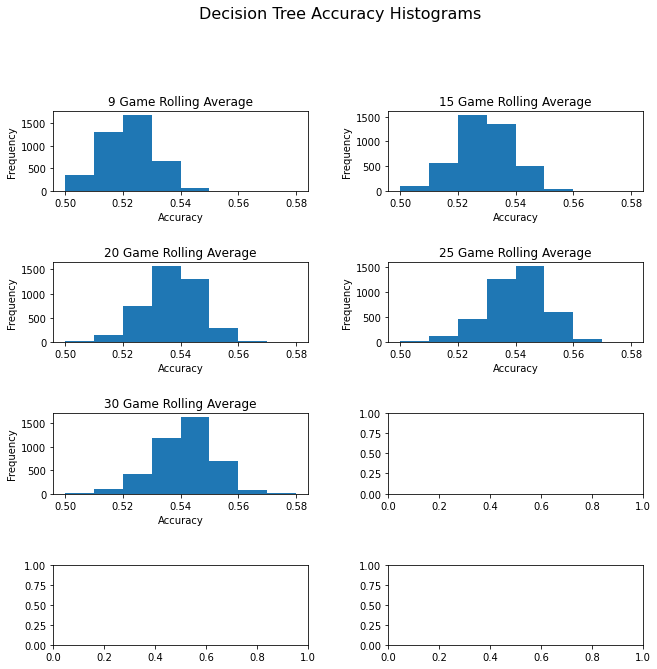

In [10]:
# Plot Histograms of accuracies
rolling_avg_games = [ "9", "15", "20", "25", "30"]
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 10), sharex=False)
fig.suptitle('Decision Tree Accuracy Histograms', fontsize=16)
fig.tight_layout(pad=5.0)
# Set the ticks and ticklabels for all axes
for r in range(len(max_acc_matrix)):
    axes[r//2, r%2].set_title(str(rolling_avg_games[r]) + " Game Rolling Average")
    axes[r//2, r%2].set_xlabel("Accuracy")
    axes[r//2, r%2].set_ylabel("Frequency")
    axes[r//2, r%2].hist(acc_matrix[r], bins=[0.50, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58])
fig.delaxes(axes[3][1])
    

    

In [11]:
# Set accuracy matrix to 2 decimal points
max_acc_matrix = np.around(max_acc_matrix, decimals=3)
max_acc_matrix

array([[0.541, 0.537, 0.539, 0.548, 0.549, 0.549, 0.55 , 0.555, 0.545,
        0.542, 0.536, 0.524],
       [0.526, 0.553, 0.543, 0.551, 0.557, 0.555, 0.56 , 0.566, 0.563,
        0.55 , 0.551, 0.539],
       [0.527, 0.541, 0.552, 0.561, 0.567, 0.563, 0.568, 0.565, 0.565,
        0.554, 0.558, 0.534],
       [0.542, 0.565, 0.563, 0.56 , 0.568, 0.57 , 0.575, 0.573, 0.567,
        0.566, 0.561, 0.557],
       [0.536, 0.549, 0.563, 0.569, 0.566, 0.573, 0.569, 0.574, 0.564,
        0.56 , 0.555, 0.552],
       [0.537, 0.564, 0.562, 0.572, 0.572, 0.572, 0.577, 0.577, 0.574,
        0.57 , 0.567, 0.555],
       [0.542, 0.555, 0.565, 0.577, 0.579, 0.579, 0.587, 0.578, 0.581,
        0.575, 0.57 , 0.561]])

(7, 12)
(5, 12)


<ipython-input-18-8a9d1cd95a47>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0, 9, 15, 20, 25, 30])


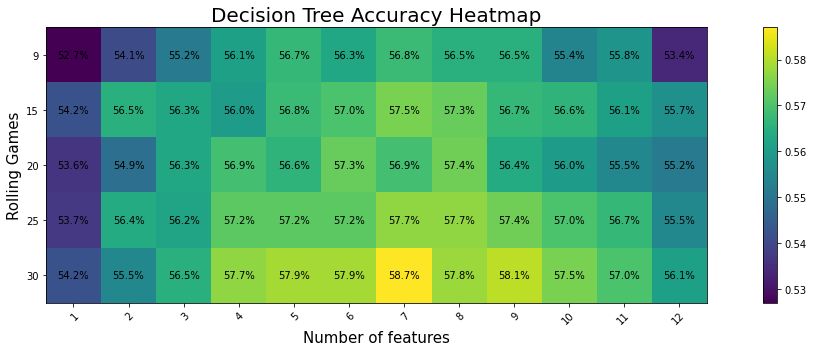

In [18]:
feature_selection_size = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12"]
print(max_acc_matrix.shape)
max_acc_matrix_new = max_acc_matrix[2:, :]
print(max_acc_matrix_new.shape)
fig, ax = plt.subplots(figsize=(16,5))
im = ax.imshow(max_acc_matrix_new)

# Show all ticks and label them with the respective list entries

ax.set_xticks(range(0, 12))
ax.set_xticklabels(range(1, 13))
ax.set_yticklabels([0, 9, 15, 20, 25, 30])

ax.figure.colorbar(im, ax = ax)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(rolling_avg_games)):
    for j in range(len(feature_selection_size)):
        text = ax.text(j, i, '{:.1%}'.format(max_acc_matrix_new[i, j,]),
                       ha="center", va="center", color="black")

ax.set_title("Decision Tree Accuracy Heatmap", size=20)
ax.set_xlabel("Number of features", size=15)
ax.set_ylabel("Rolling Games", size=15)
fig.tight_layout()
plt.show()